<a href="https://colab.research.google.com/github/daryl-ramdin/inm707-daryl-ramdin/blob/main/atari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Packages

In [22]:
!pip install ray
!pip install gymnasium
!pip install "gymnasium[atari]"
!pip install "gymnasium[accept-rom-license]"
!pip install -U tensorboardx

import ray
import gymnasium 
import torch
                 
from ray.rllib.algorithms.dqn.dqn import DQNConfig
from ray.rllib.algorithms.ppo import PPOConfig
from ray.tune.logger import pretty_print
from ray import air, tune


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
device = torch.device("cpu")
if torch.cuda.is_available():
    device = torch.device('cuda')

print("Selected device:",device)

Selected device: cuda


In [12]:


# # #ray.shutdown()
# # #ray.init()

# #Let's configure our algorithm


# config = DQNConfig()
# config = config.environment("Riverraid-ram-v4")
# config.num_gpus = 1
# config.replay_buffer_config["prioritized_replay"] = True #tune.grid_search([False,True])


# algo = config.build()
# # tuner = tune.Tuner("DQN",param_space=config.to_dict())
# # results = tuner.fit()



# result = {}
# logger = []

# for i in range(10):
#   results = algo.train()
#   logger.append([i,results["episode_reward_mean"],0])
#   print("Epoch",i,"Episode Mean Reward",results["episode_reward_mean"])

# print("done")

In [3]:
# !pip install ray
# !pip install gymnasium
# !pip install "gymnasium[atari]"
# !pip install "gymnasium[accept-rom-license]"
# !pip install -U tensorboardx


# !pip install shimmy
# !pip install autorom
# !pip install "autorom[accept-rom-license]"

#from ray.tune.logger import pretty_print
import gymnasium
#import shimmy

#!pip install "autorom[accept-rom-license]"
# !pip install autorom

#!pip install gym[atari]
#!pip install autorom[accept-rom-license]
#!AutoROM #--install-dir roms

env = gymnasium.make("Riverraid-ram-v4")
print("done")




done


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


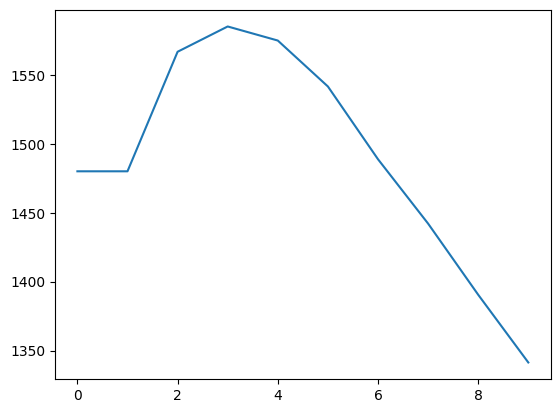

In [23]:

import numpy as np

import matplotlib.pyplot as plt

#Calculate the cumulative average over the episodes
logger = np.array(logger)
for i in range(len(logger)):
    logger[i][2] = sum(logger[0:i + 1, [1]]) / (i + 1)  # calculate the average cumulative reward
plt.plot(logger[:, [0]], logger[:, [2]], label="Average cumulative Reward")
plt.show()